In [33]:
# when you use ‘read.csv’ (or an equivalent) please ensure that you set ‘stringsAsFactors=TRUE’, or otherwise coerce your character string predictors to factors after the fact.
df <- read.csv("/Users/gawain/Desktop/3.UBC/Block3/DATA-571 - Resampling and Regularization/Assignment/A1/datasalaries.csv", stringsAsFactors=TRUE)
head(df)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,Google,400000,5,5,Male,Asian,PhD
2,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
3,Google,337000,6,6,Male,Asian,Bachelor's Degree
4,Microsoft,222000,4,4,Male,Asian,Master's Degree
5,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
6,Amazon,620000,19,7,Male,Asian,Bachelor's Degree


### part a

Create a regression tree for a data science/STEM salaries given the remainder of the variables in the data set. 

Provide the tree, including labels — using the command text(treename, pretty=0) will provide a (somewhat) more understandable split labelling for the questions that follow.

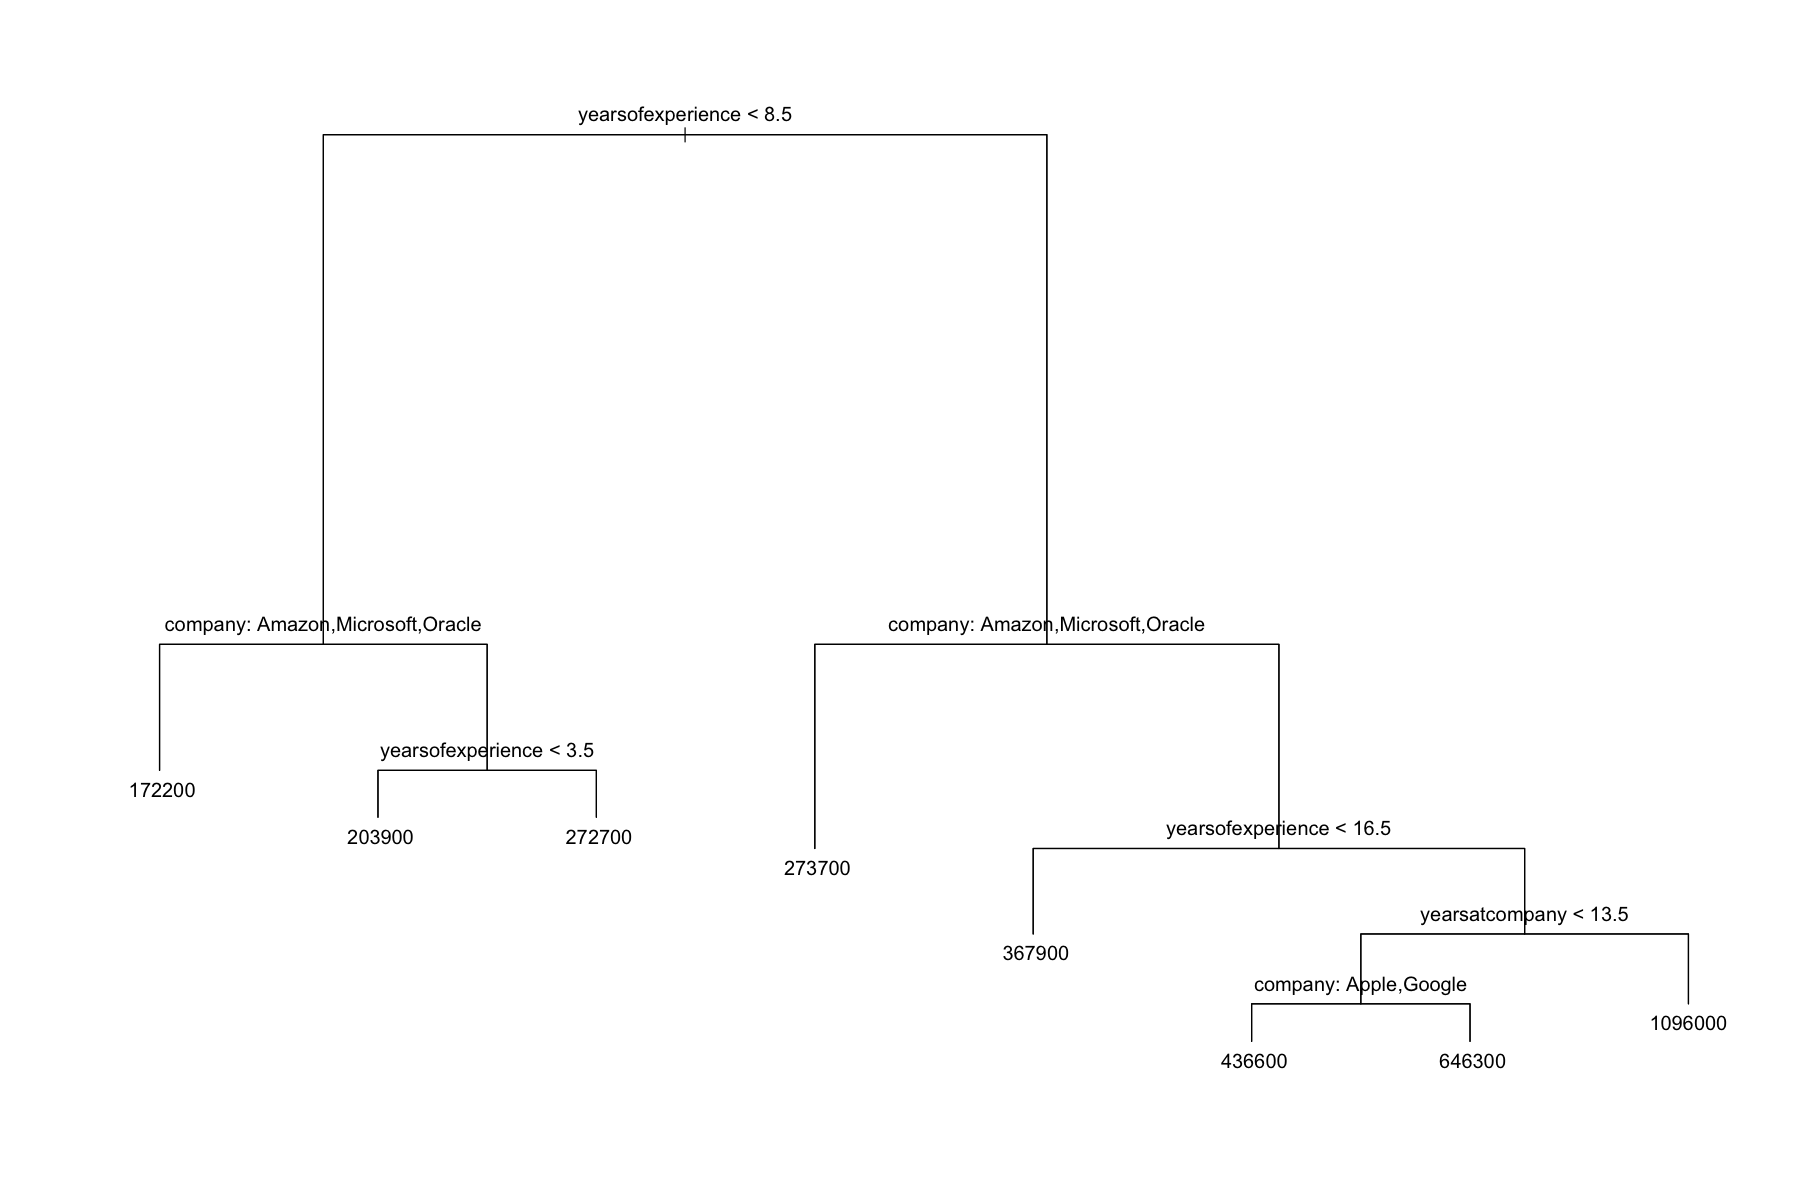

In [3]:
# (a) Create a regression tree for a data science/STEM salaries given the remainder of the variables in the data set. 
# Provide the tree, including labels — using the command text(treename, pretty=0) will provide a (somewhat) more understandable split labelling for the questions that follow.
# library(rpart)       # performing regression trees
library(tree)

salary <- read.csv("/Users/gawain/Desktop/3.UBC/Block3/DATA-571 - Resampling and Regularization/Assignment/A1/datasalaries.csv", stringsAsFactors=TRUE)
# salary$company <- as.factor(salary$company)
# salary$gender <- as.factor(salary$gender)
# salary$Race <- as.factor(salary$Race)
# salary$Education <- as.factor(salary$Education)

salary <- data.frame(salary)
# df$salary <- factor(data_df$totalyearlycompensation)

simtree <- tree(totalyearlycompensation~ ., data=salary)

# make the plot size larger
options(repr.plot.width=15, repr.plot.height=10)
plot(simtree, main="Regression Tree", cex=0.8)
text(simtree, pretty=0)

### part b 

Based only on the tree outputted in the previous question, which companies included in this data set would you prefer to work for? Why?

In [35]:
# 1. when the WoE (work of experience ) < 8.5, the optimal yearly compensation is in "Apple and Google"
# 2. when the WoE (work of experience ) > 8.5 and < 16.5, the optimal yearly compensation is in "Apple and Google"
# 3. when the WoE (work of experience ) < 13.5 , the optimal yearly compensation is in "Apple and Google"
# 4. when the WoE (work of experience ) > 13.5 and < 16.5, the optimal yearly compensation is in "Apple and Google"
# conclusion: the optimal yearly compensation is in "Apple and Google"

### part c

Using set.seed(51341), perform 10-fold cross-validation using cv.tree. 

Plot the resulting object. How many terminal nodes does cross-validation suggest?

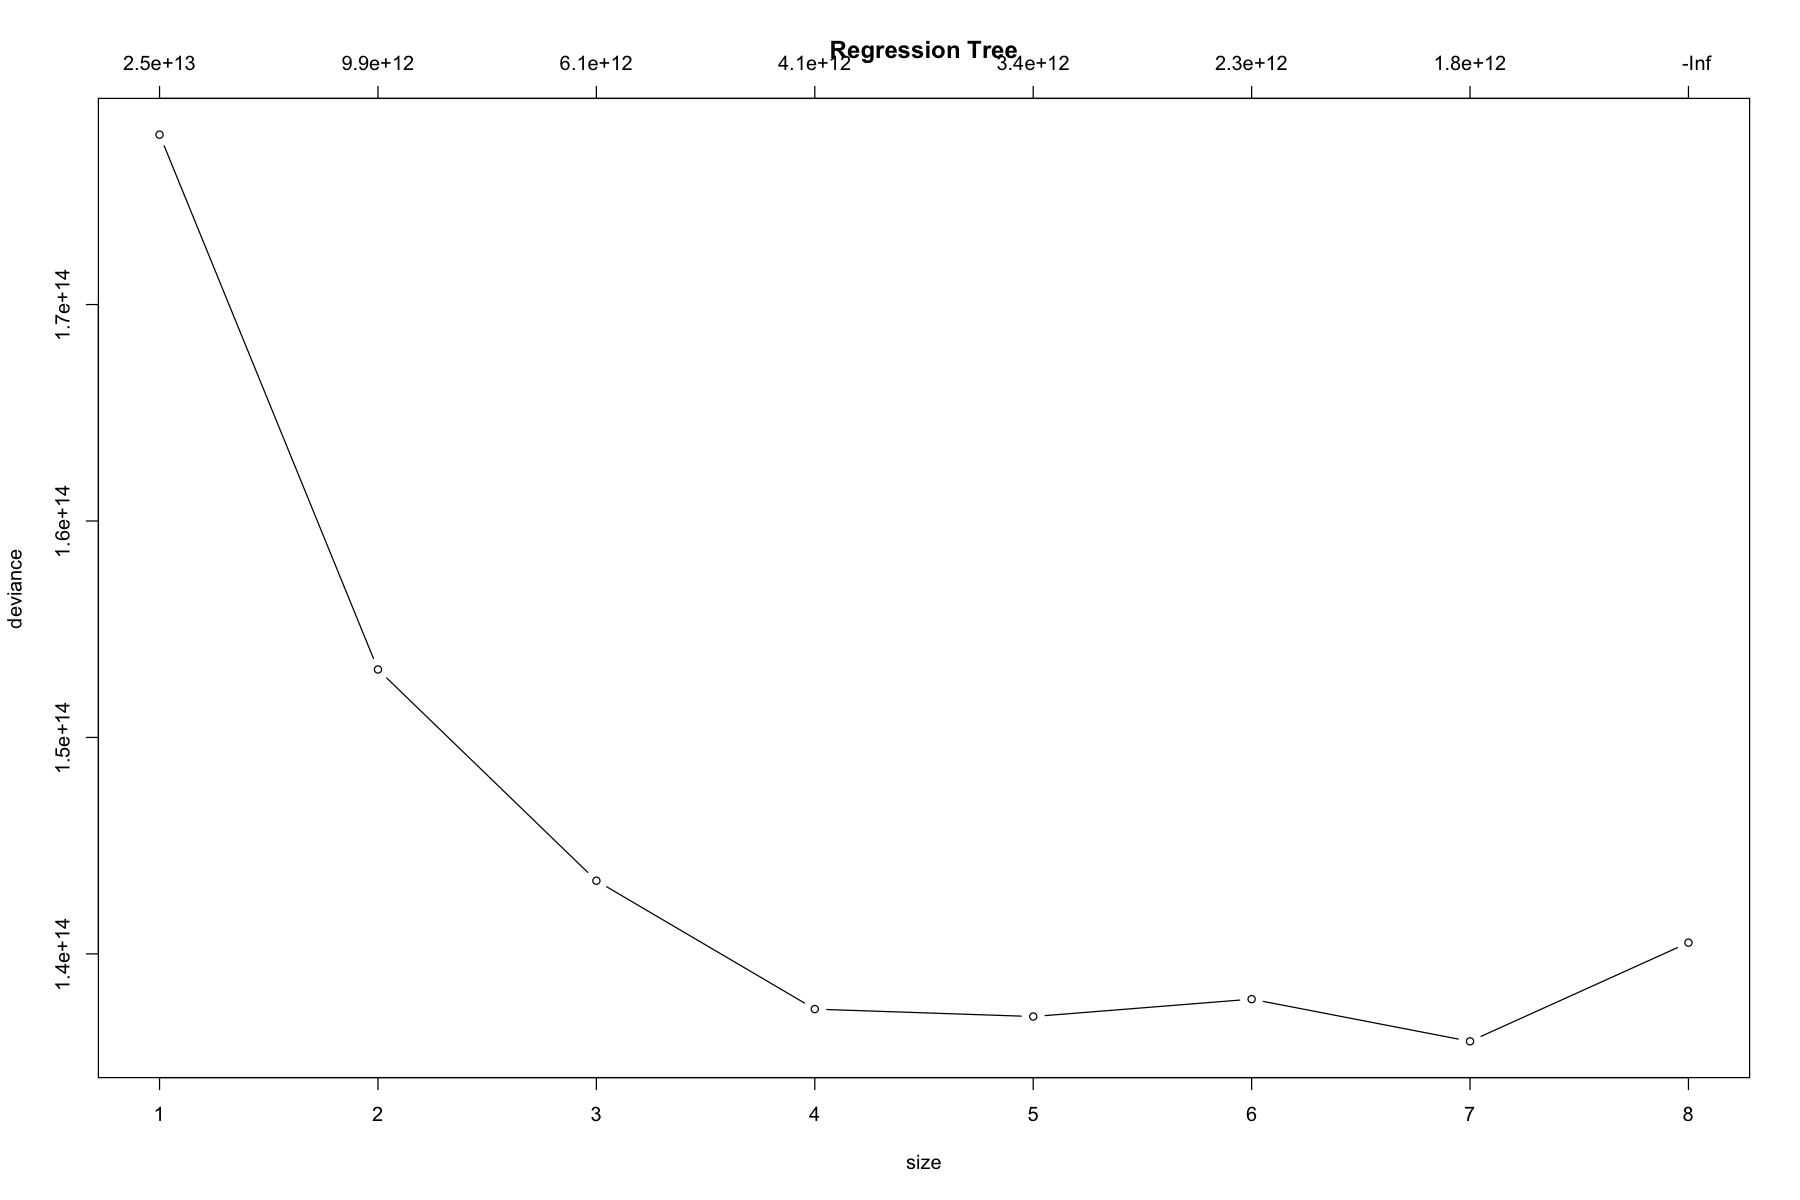

In [4]:
set.seed(51341)
#  10-fold cross-validation using cv.tree
cv_tree <- cv.tree(simtree, K=10)
loocv_RSS <- cv_tree$dev[1]
plot(cv_tree, main="Regression Tree", cex=0.8, type='b')
# MSE

In [10]:
# MSE
MSE <- cv_tree$dev[1]/nrow(salary)
cat("MSE:", MSE)

MSE: 18693572390

### part d

Prune your original tree. Give the predicted salary for a self-identiﬁed Asian female with a PhD working at Google with 10 years of experience. 

Use the predict() function to do this, but PLEASE double-check with your tree diagram and brain. My warning is to pay careful attention to how the character vectors are factored, and note that you will have to setup the entry as a ‘data.frame’. 

You will likely ﬁnd this ﬁnicky...but it is good practice for real life data science messiness.

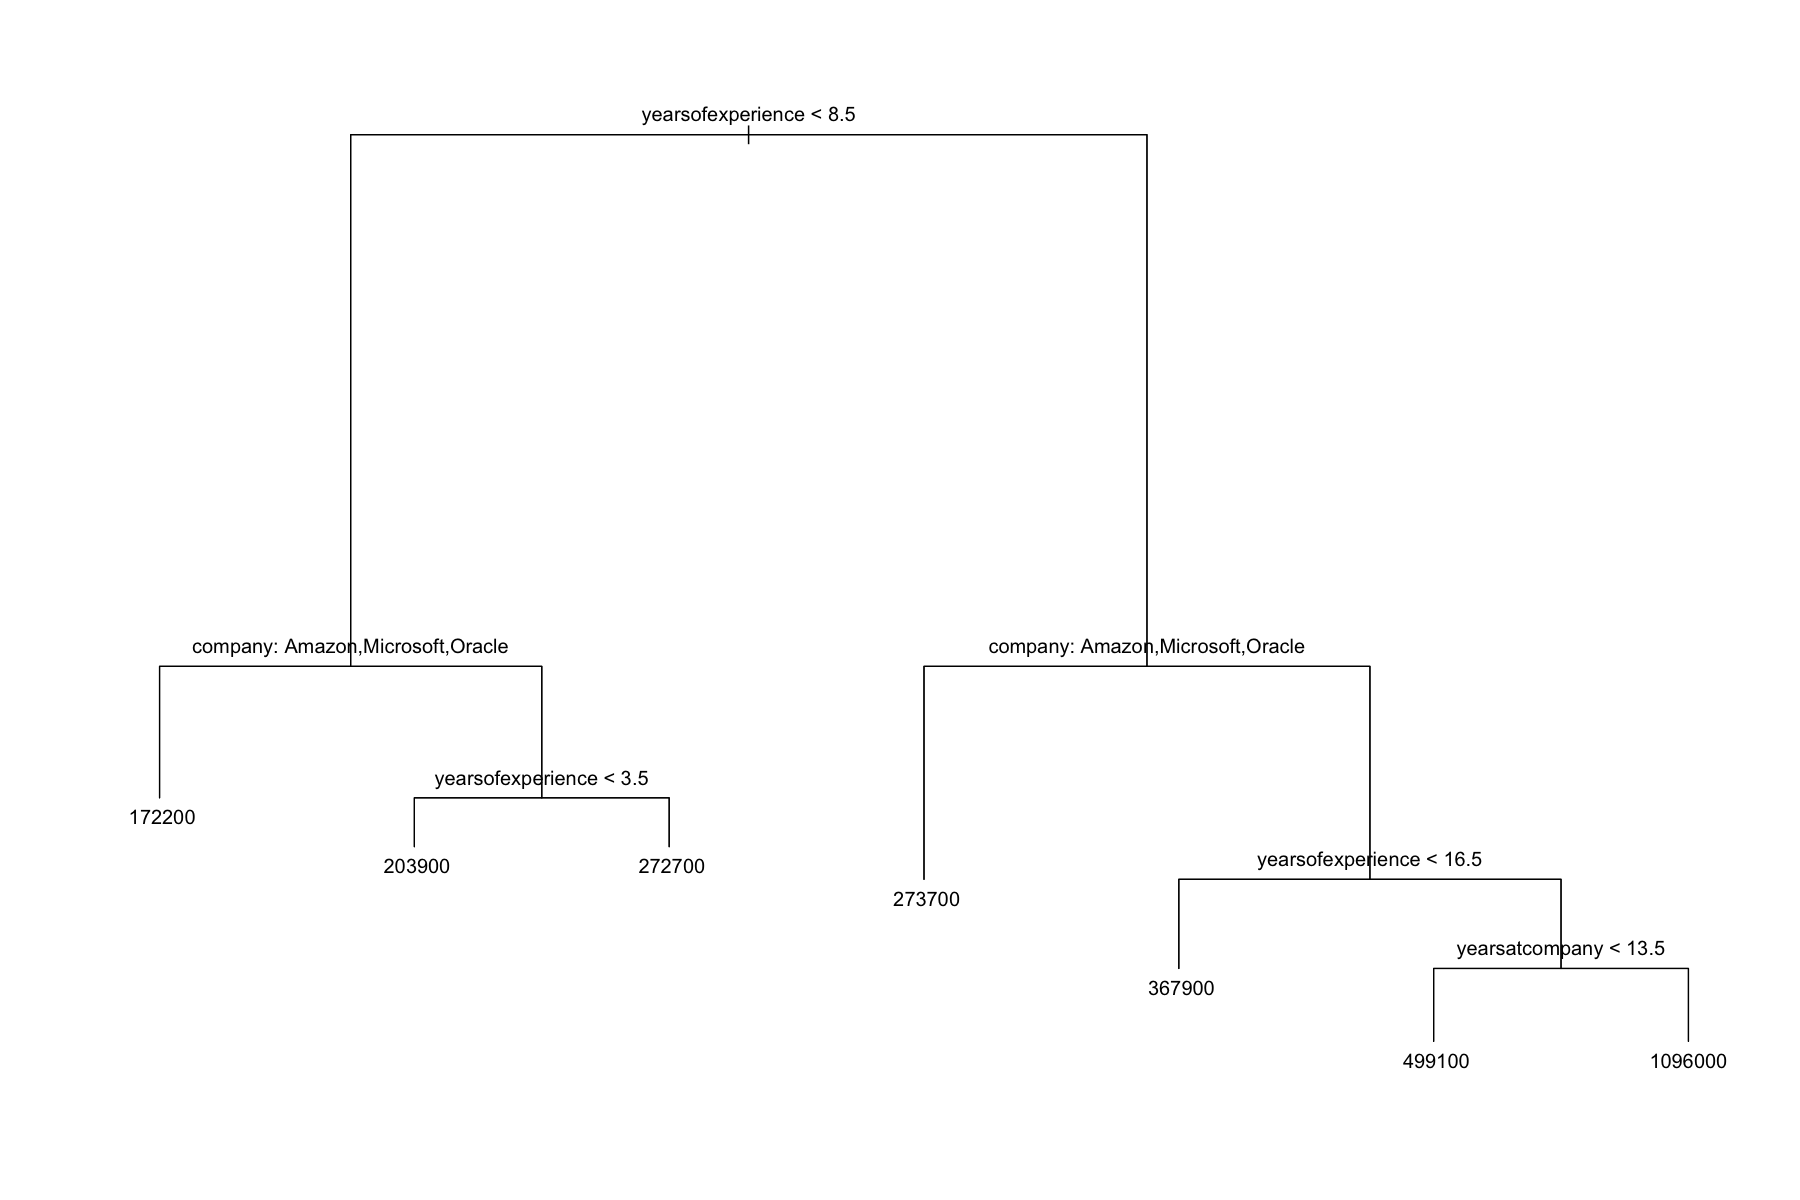

In [5]:
# (d) Prune your original tree. Give the predicted salary for a self-identiﬁed Asian female with a PhD working at Google with 10 years of experience. 
# Use the predict() function to do this, but PLEASE double-check with your tree diagram and brain. 
# My warning is to pay careful attention to how the character vectors are factored, and note that you will have to setup the entry as a ‘data.frame’. 
# You will likely ﬁnd this ﬁnicky...but it is good practice for real life data science messiness.

# prune the tree
# prune_tree <- prune.tree(simtree, FUN = prune.tree)
prune_tree <- prune.tree(simtree, best=7)
plot(prune_tree, main="Pruned Tree")
text(prune_tree, pretty=0)

In [6]:
# Give the predicted salary for a self-identiﬁed Asian female with a PhD working at Google with 10 years of experience. 
# Use the predict() function to do this, but PLEASE double-check with your tree diagram and brain. 

company <- c("Google")
totalyearlycompensation <- c('')
yearsofexperience <- c(10)
yearsatcompany <- c(10)
gender <- c("Female")
Race <- c("Asian")
Education <- c("PhD")
x_for_predict <- data.frame(company, totalyearlycompensation ,yearsofexperience, yearsatcompany, gender, Race, Education, stringsAsFactors=TRUE)

y_pred <- predict(prune_tree, x_for_predict, type="vector")
# y_pred

cat('the prediction for the provided condition above is:', y_pred)

the prediction for the provided condition above is: 273747.6

### part e

Now ﬁt a tree to the training set, prune via 10-fold CV, and once again give the predicted salary for the individual from part (d) via the predict function.


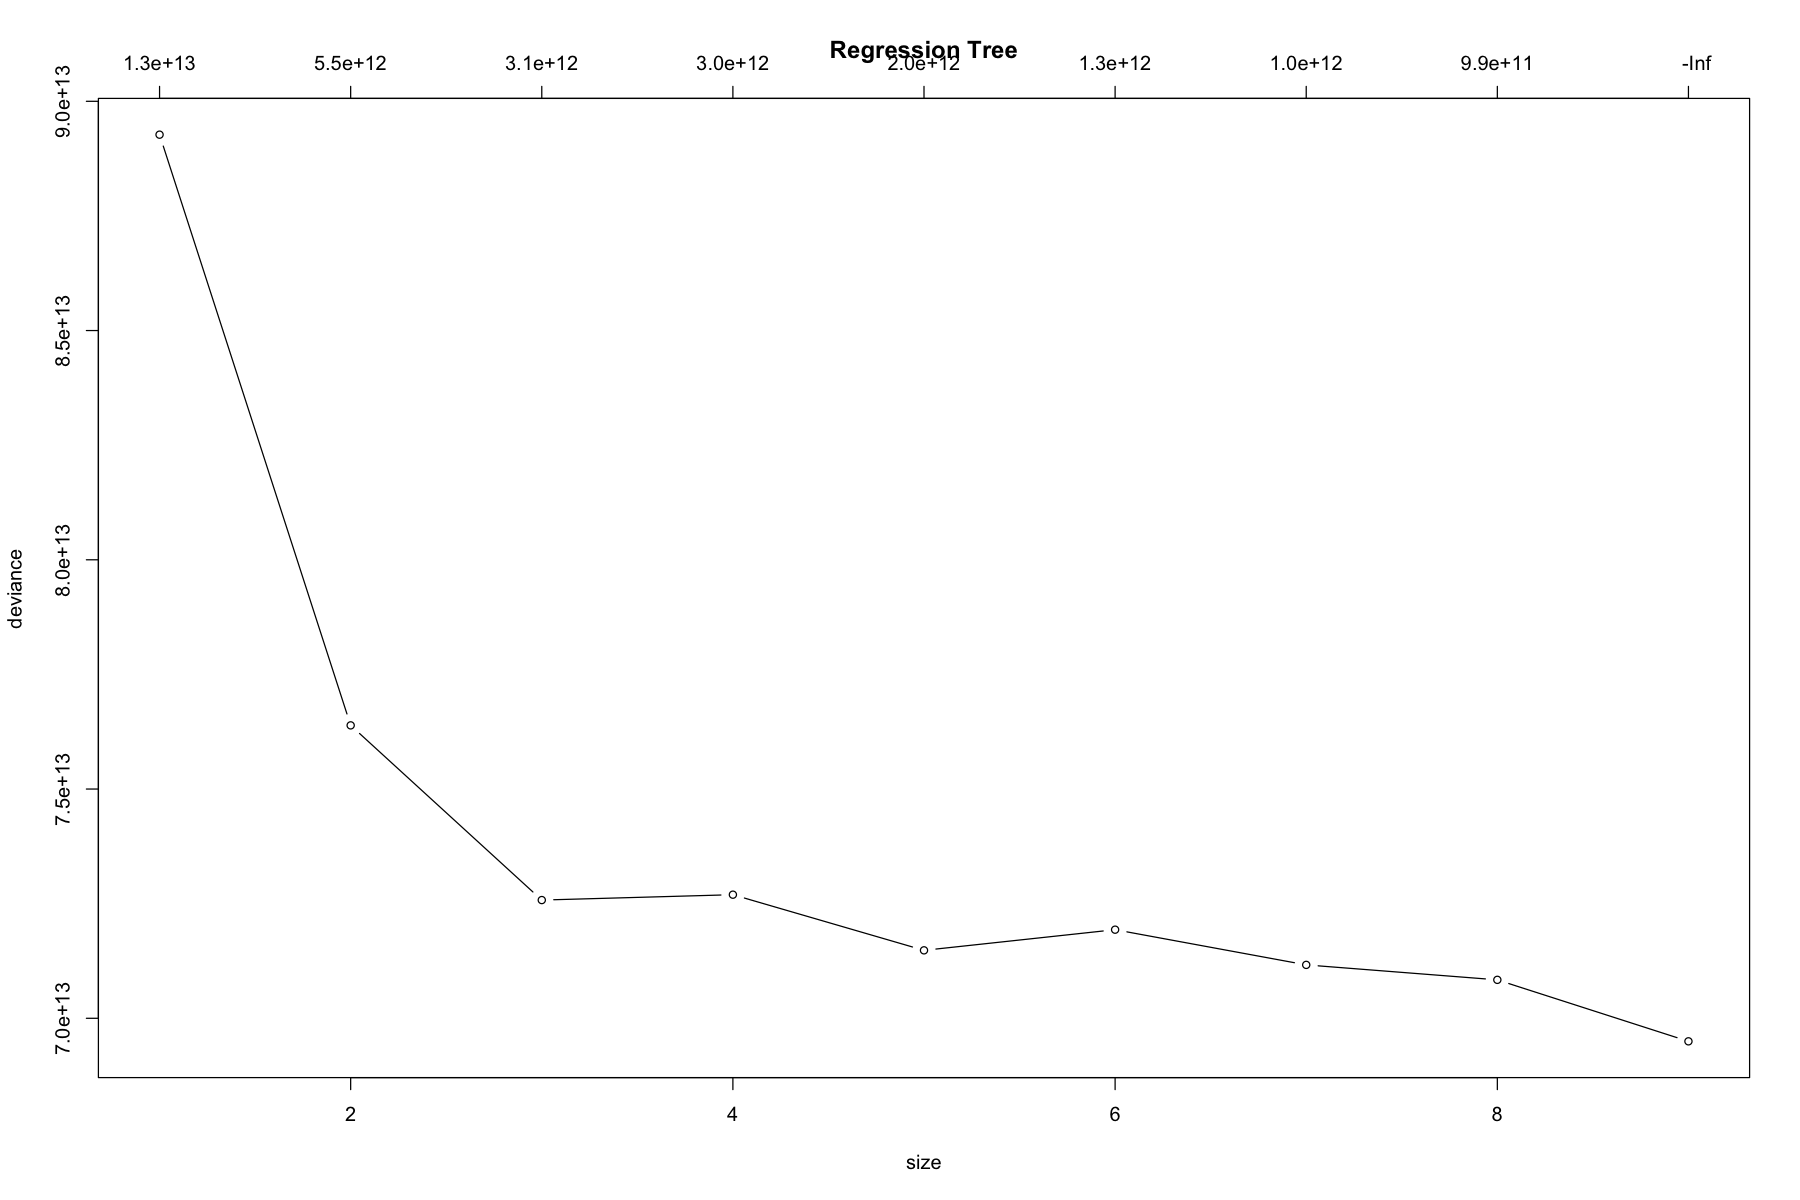

In [11]:
set.seed(763) 
dsindex <- sample(1:nrow(salary), 4000) 
# trainindex <- dsindex[1:3000]
dstrain <- salary[dsindex, ] 
dstest <- salary[-dsindex, ] 

simtree <- tree(totalyearlycompensation~ ., data=dstrain)

#  10-fold cross-validation using cv.tree
cv_tree2 <- cv.tree(simtree, K=10)
loocv_RSS <- cv_tree2$dev[1]

plot(cv_tree2, main="Regression Tree", cex=0.8, type='b')

In [12]:
prune.tree_10 <- prune.tree(simtree, best=9)
y_pred2 <- predict(prune.tree_10, x_for_predict, type="vector")
cat('the prediction for the provided condition above is:', y_pred2)

the prediction for the provided condition above is: 253879.7

### part f

Provide the estimated MSE of the model in part (e) — that is, calculate the MSE of the test set. Is the MSE of the test set close to the expected MSE from the 10-fold CV from question (c)?

In [13]:
# Provide the estimated MSE of the model in part (e) — that is, calculate the MSE of the test set. 
# Is the MSE of the test set close to the expected MSE from the 10-fold CV from question (c)?
# MSE of the test set
y_pred3 <- predict(prune.tree_10, dstest, type="vector")
MSE <- mean((y_pred3 - dstest$totalyearlycompensation)^2)
cat('the MSE of the test set is:', MSE)

# the MSE in part f is 1.93e+11, which is higher than the expected MSE from the 10-fold CV from question (c) (1.86e+11)
# the MSE of the test set is close to the expected MSE from the 10-fold CV from question (c)

the MSE of the test set is: 19324364849